In [4]:
from google.colab import files
uploaded = files.upload()



Saving country_wise_latest.csv to country_wise_latest.csv


In [6]:
import pandas as pd
df = pd.read_csv('country_wise_latest.csv')
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [9]:
df.isnull().sum()


,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [10]:
# Sort the dataset by 'Confirmed' in descending order and get the top 10 countries
top10_confirmed = df.sort_values(by='Confirmed', ascending=False).head(10)

# Display the country and confirmed cases
top10_confirmed[['Country/Region', 'Confirmed']]


,Country/Region,Confirmed
173,US,4290259
23,Brazil,2442375
79,India,1480073
138,Russia,816680
154,South Africa,452529
111,Mexico,395489
132,Peru,389717
35,Chile,347923
177,United Kingdom,301708
81,Iran,293606


In [11]:
# Sort the dataset by 'Deaths' in descending order and get the top 10 countries
top10_deaths = df.sort_values(by='Deaths', ascending=False).head(10)

# Display the country and death count
top10_deaths[['Country/Region', 'Deaths']]


,Country/Region,Deaths
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30212
157,Spain,28432
132,Peru,18418
81,Iran,15912


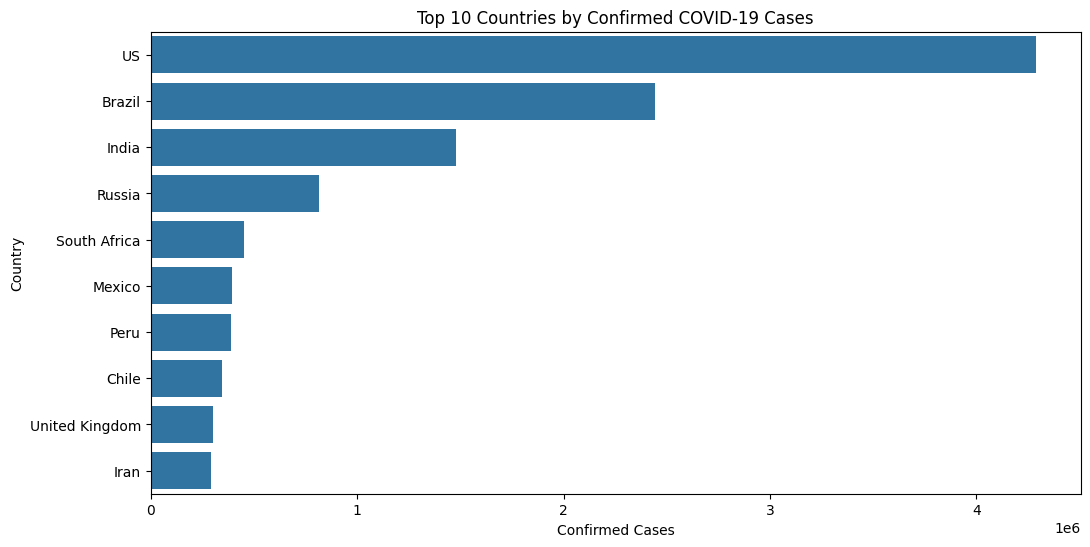

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12,6))

# Create a horizontal bar plot for confirmed cases
sns.barplot(x='Confirmed', y='Country/Region', data=top10_confirmed)

# Add title and axis labels
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')

# Show the plot
plt.show()


In [13]:
# Calculate death rate (%) = (Deaths / Confirmed) * 100
df['Death_Rate'] = (df['Deaths'] / df['Confirmed']) * 100

# Calculate recovery rate (%) = (Recovered / Confirmed) * 100
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100

# Show first 5 rows with new columns
df[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Death_Rate', 'Recovery_Rate']].head()


,Country/Region,Confirmed,Deaths,Recovered,Death_Rate,Recovery_Rate
0,Afghanistan,36263,1269,25198,3.499435,69.486805
1,Albania,4880,144,2745,2.950820,56.250000
2,Algeria,27973,1163,18837,4.157581,67.339935
3,Andorra,907,52,803,5.733186,88.533627
4,Angola,950,41,242,4.315789,25.473684


**Top 10 Countries by Highest Death Rate (with minimum 10,000 confirmed cases)**

In [14]:
# Filter countries with at least 10,000 confirmed cases to avoid skewed rates
filtered_df = df[df['Confirmed'] >= 10000]

# Sort by death rate descending and get top 10
top10_death_rate = filtered_df.sort_values(by='Death_Rate', ascending=False).head(10)

top10_death_rate[['Country/Region', 'Death_Rate']]


,Country/Region,Death_Rate
177,United Kingdom,15.194824
16,Belgium,14.785934
85,Italy,14.256596
61,France,13.710790
120,Netherlands,11.532773
111,Mexico,11.131030
157,Spain,10.436787
32,Canada,7.680022
161,Sweden,7.179293
51,Ecuador,6.816082


**Step 9: Visualize Death Rate for Top 10 Countries**



<ipython-input-15-be22215d4460>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Death_Rate', y='Country/Region', data=top10_death_rate, palette='Reds_r')


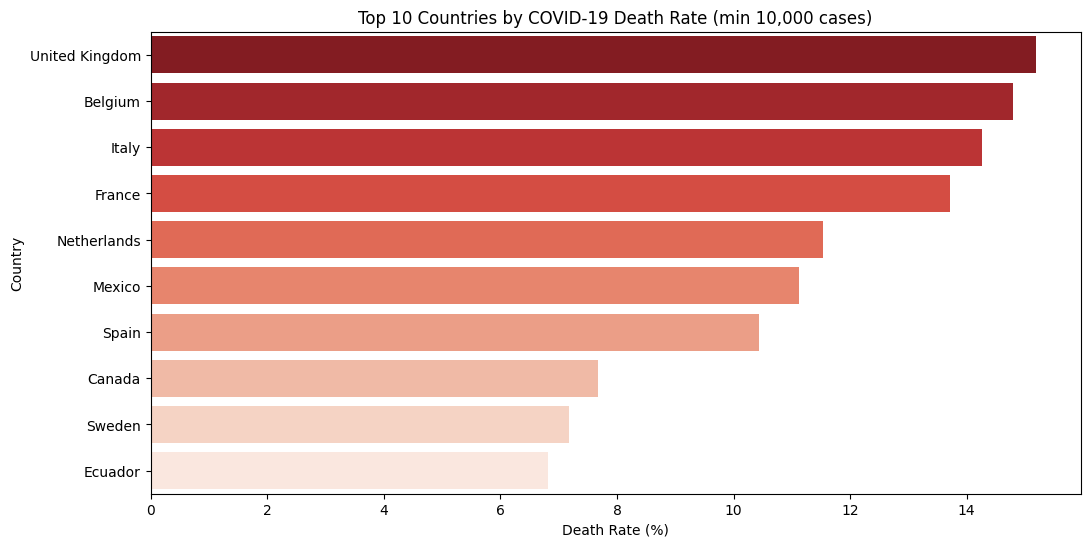

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='Death_Rate', y='Country/Region', data=top10_death_rate, palette='Reds_r')
plt.title('Top 10 Countries by COVID-19 Death Rate (min 10,000 cases)')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country')
plt.show()


**Step 10: Top 10 Countries by Highest Recovery Rate (with min 10,000 confirmed cases)**

In [16]:
top10_recovery_rate = filtered_df.sort_values(by='Recovery_Rate', ascending=False).head(10)
top10_recovery_rate[['Country/Region', 'Recovery_Rate']]


,Country/Region,Recovery_Rate
136,Qatar,97.017254
172,Turkey,92.709861
35,Chile,91.961152
65,Germany,91.889412
47,Denmark,91.599448
155,South Korea,91.579244
12,Bahrain,91.459399
36,China,90.880702
83,Ireland,90.236366
15,Belarus,89.949592


**Step 11: Visualize Recovery Rate for Top 10 Countries**



<ipython-input-17-10a07bc60eff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recovery_Rate', y='Country/Region', data=top10_recovery_rate, palette='Greens_r')


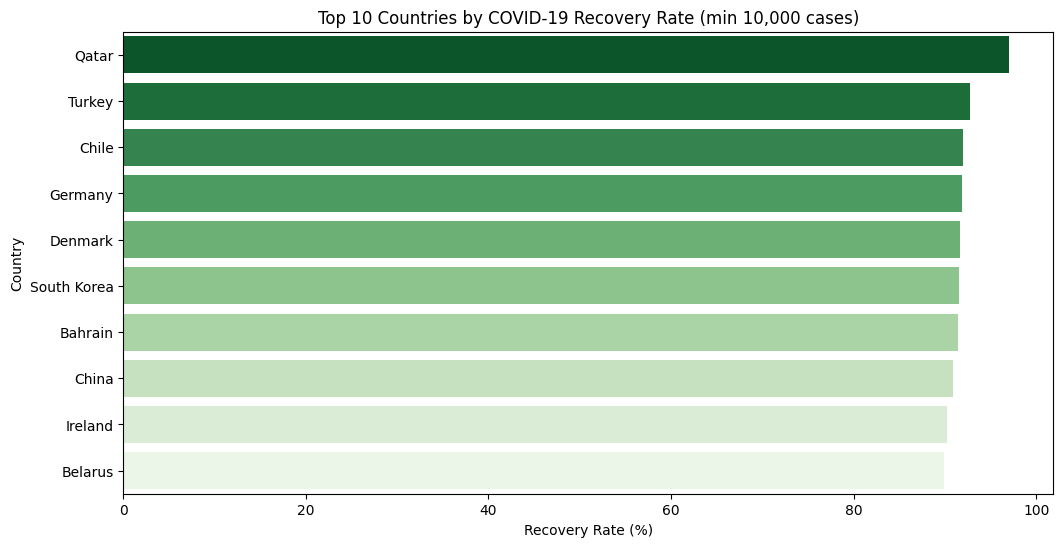

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='Recovery_Rate', y='Country/Region', data=top10_recovery_rate, palette='Greens_r')
plt.title('Top 10 Countries by COVID-19 Recovery Rate (min 10,000 cases)')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country')
plt.show()


**Step 12: Visualize Confirmed Cases for Top 10 Countries**

<ipython-input-18-f82c0152b6d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top10_confirmed, palette='Blues_r')


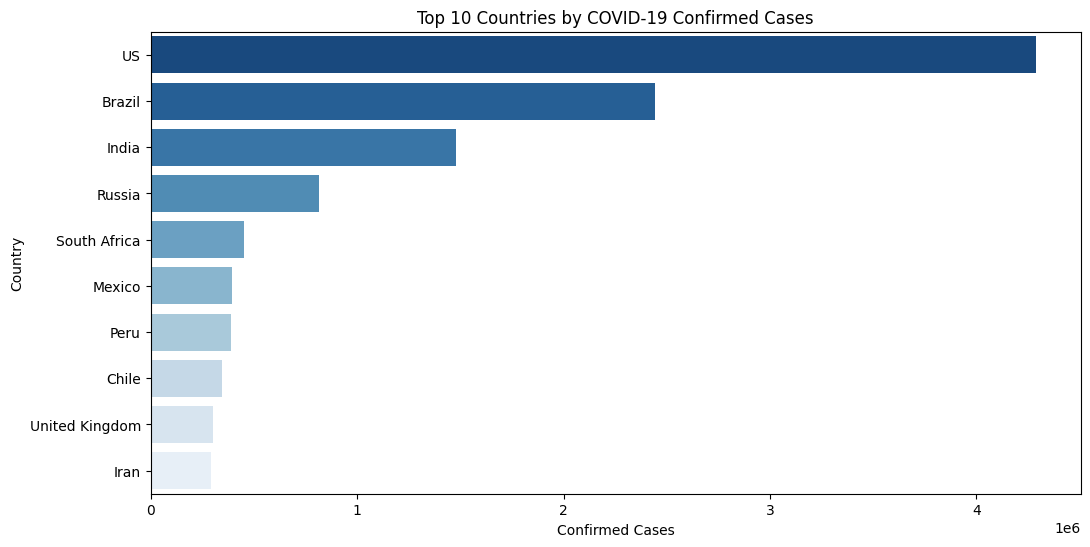

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y='Country/Region', data=top10_confirmed, palette='Blues_r')
plt.title('Top 10 Countries by COVID-19 Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()


**Top 10 Countries by Active Cases**

<ipython-input-19-b1552f8f5fa9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Active', y='Country/Region', data=top10_active, palette='Blues_r')


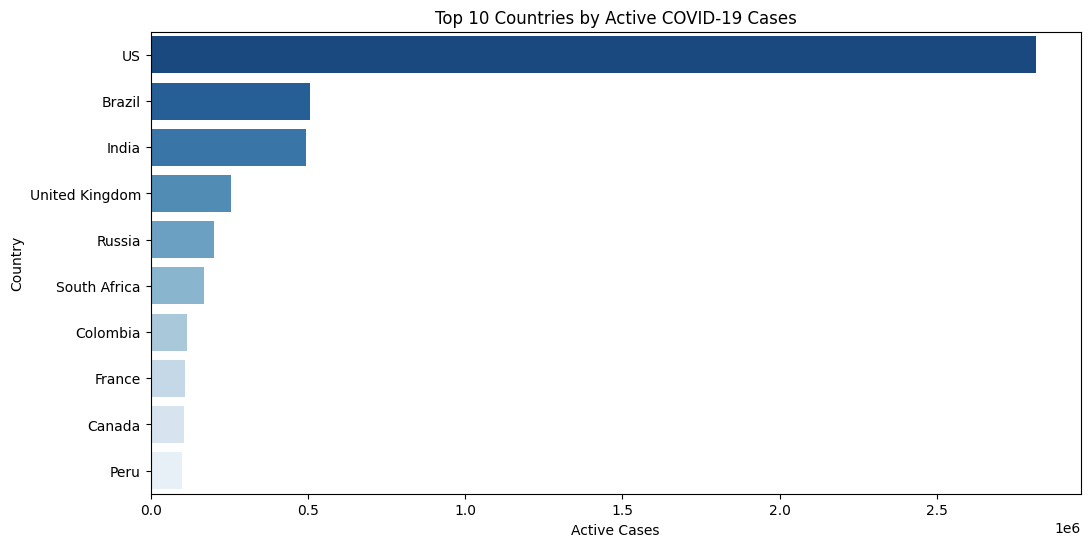

In [19]:
# Sort countries by active cases and get top 10
top10_active = df.sort_values(by='Active', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Active', y='Country/Region', data=top10_active, palette='Blues_r')
plt.title('Top 10 Countries by Active COVID-19 Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country')
plt.show()


**Scatter Plot: Confirmed Cases vs Deaths**

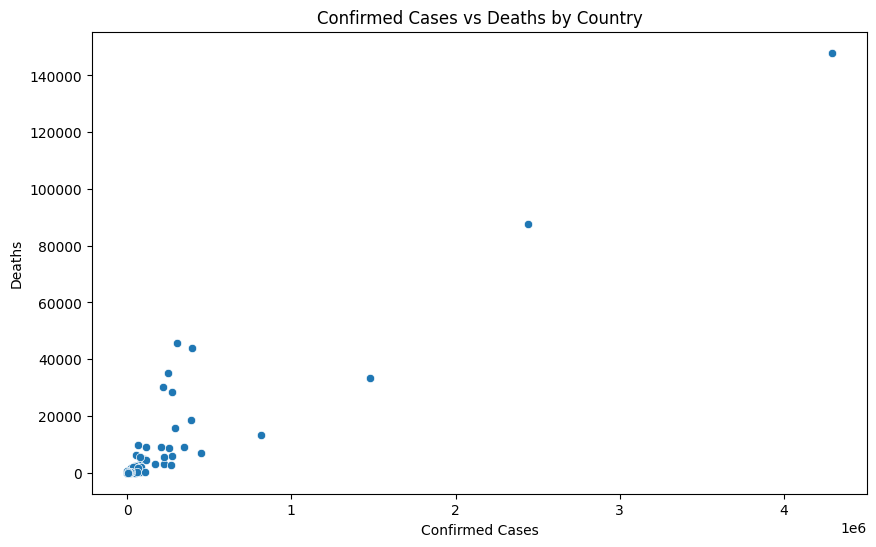

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.title('Confirmed Cases vs Deaths by Country')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()
